<a href="https://colab.research.google.com/github/Leinadh/PeruvianImageGenerator/blob/master/xgan_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!tar zxvf '/content/drive/My Drive/Made with ML/datasets/cartoonset10k.tgz'

Se han truncado las últimas 5000 líneas del flujo de salida.
cartoonset10k/cs11130198548099864740.png
cartoonset10k/cs11130522928710913906.csv
cartoonset10k/cs11130522928710913906.png
cartoonset10k/cs11130692035407747496.csv
cartoonset10k/cs11130692035407747496.png
cartoonset10k/cs1113080672465802980.csv
cartoonset10k/cs1113080672465802980.png
cartoonset10k/cs11131138722323947780.csv
cartoonset10k/cs11131138722323947780.png
cartoonset10k/cs1113121412202668922.csv
cartoonset10k/cs1113121412202668922.png
cartoonset10k/cs11131333133753359573.csv
cartoonset10k/cs11131333133753359573.png
cartoonset10k/cs1113143340294813643.csv
cartoonset10k/cs1113143340294813643.png
cartoonset10k/cs11131732994961040179.csv
cartoonset10k/cs11131732994961040179.png
cartoonset10k/cs1113191746674328122.csv
cartoonset10k/cs1113191746674328122.png
cartoonset10k/cs11131958805482037869.csv
cartoonset10k/cs11131958805482037869.png
cartoonset10k/cs1113266829786440678.csv
cartoonset10k/cs1113266829786440678.png
cartoo

In [3]:
! tar -zxvf '/content/drive/My Drive/Made with ML/datasets/vgg_face_dataset.tar.gz'

vgg_face_dataset/
vgg_face_dataset/files/
vgg_face_dataset/licence.txt
vgg_face_dataset/README
vgg_face_dataset/files/A.J._Buckley.txt
vgg_face_dataset/files/A.R._Rahman.txt
vgg_face_dataset/files/A_P_J_Abdul_Kalam.txt
vgg_face_dataset/files/Aamir_Khan.txt
vgg_face_dataset/files/Aaron_Staton.txt
vgg_face_dataset/files/Aaron_Tveit.txt
vgg_face_dataset/files/Aaron_Yoo.txt
vgg_face_dataset/files/Abbie_Cornish.txt
vgg_face_dataset/files/Abel_Ferrara.txt
vgg_face_dataset/files/Abigail_Breslin.txt
vgg_face_dataset/files/Abigail_Klein.txt
vgg_face_dataset/files/Abigail_Spencer.txt
vgg_face_dataset/files/Abraham_Benrubi.txt
vgg_face_dataset/files/Adam_Baldwin.txt
vgg_face_dataset/files/Adam_Beach.txt
vgg_face_dataset/files/Adam_Brody.txt
vgg_face_dataset/files/Adam_Buxton.txt
vgg_face_dataset/files/Adam_Copeland.txt
vgg_face_dataset/files/Adam_Driver.txt
vgg_face_dataset/files/Adam_G._Sevani.txt
vgg_face_dataset/files/Adam_Garcia.txt
vgg_face_dataset/files/Adam_Godley.txt
vgg_face_dataset/file

#PREPROCESSING IMAGES 

In [4]:
!rm -r PeruvianImageGenerator/ ##to delete file cloned before

rm: cannot remove 'PeruvianImageGenerator/': No such file or directory


In [5]:
!git clone https://github.com/Leinadh/PeruvianImageGenerator.git

Cloning into 'PeruvianImageGenerator'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 25 (delta 2), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [6]:
import PeruvianImageGenerator.scripts.download_faces as dlf
import PeruvianImageGenerator.scripts.plot_utils as plot_utils

In [8]:
data_path = '/content/vgg_face_dataset/files'
target_path='/content/datasets/faces_people/'
dlf.parse_data(data_path, 10, 2, target_path)

Processing Martin_Shaw:  10%|█         | 1/10 [00:00<00:08,  1.06it/s] 

Finished Downloading


Processing Ali_Fedotowsky:  20%|██        | 2/10 [00:02<00:08,  1.01s/it]

Finished Downloading


Processing Dot-Marie_Jones:  30%|███       | 3/10 [00:02<00:05,  1.29it/s]

Finished Downloading


Processing Jerome_Flynn:  40%|████      | 4/10 [00:02<00:04,  1.47it/s]   

Finished Downloading


Processing Embeth_Davidtz:  50%|█████     | 5/10 [00:04<00:04,  1.04it/s]

Finished Downloading


Processing Don_Rickles:  60%|██████    | 6/10 [00:05<00:03,  1.15it/s]   

Finished Downloading


Processing Fanny_Ardant:  70%|███████   | 7/10 [00:05<00:02,  1.15it/s]

Finished Downloading


Processing Martin_Kove:  80%|████████  | 8/10 [00:06<00:01,  1.38it/s] 

Finished Downloading


Processing AnnaSophia_Robb: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

Finished Downloading
Finished Downloading


In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image

In [10]:
def limpiar_archivos_corruptos(path, format='.jpg'):   
  for filename in os.listdir(path):
    if filename.endswith(format):
      try:
        img = Image.open(os.path.join(path,filename)) # open the image file
        img.verify() # verify that it is, in fact an image
      except:
        os.remove(os.path.join(path,filename))
        print('Removiendo archivo corrupto:', filename) # print out the names of corrupt files


In [11]:
limpiar_archivos_corruptos(target_path)

In [12]:
path = '/content/datasets'

In [13]:
img_size = 64
batch_size = 64

In [14]:
# Especificamos la función de preprocesamiento
train_datagen = ImageDataGenerator(validation_split=0.2)

In [15]:
train_generator = train_datagen.flow_from_directory(path, target_size=(img_size, img_size), batch_size=batch_size, subset='training')

Found 14 images belonging to 1 classes.


In [16]:
validation_generator = train_datagen.flow_from_directory(path, target_size=(img_size, img_size), batch_size=batch_size, subset='validation')

Found 3 images belonging to 1 classes.


faces_people/Fred_Armisen_0.jpg


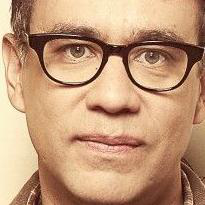

In [31]:
# Veamos alguna de las imágenes
random_img = np.random.choice(train_generator.filenames)
print(random_img)
Image.open(path + '/' + random_img)

# MODEL XGAN

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, ZeroPadding2D,Reshape, Conv2DTranspose, MaxPool2D, AvgPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization,Input, GlobalAvgPool2D, GlobalMaxPool2D, concatenate, Convolution2D, Activation,GlobalAveragePooling2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model


In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
def encoder_e1():
  #encoder image to avatar
  e1 = model_in = Input((64,64,3))
  e1 = Conv2D(filters = 32, kernel_size = 5, strides=(2,2), padding='same', activation = 'relu', kernel_initializer = 'he_normal') (e1) 
  e1 = Conv2D(filters = 64, kernel_size = 5, strides=(2,2), padding='same', activation = 'relu', kernel_initializer = 'he_normal') (e1)
  
  model = Model(model_in, e1)

  #model.compile()

  return model

In [ ]:
def encoder_e2():
  #encoder image to avatar
  e2 = model_in = Input((64,64,3))
  e2 = Conv2D(filters = 32, kernel_size = 5, strides=(2,2), padding='same', activation = 'relu', kernel_initializer = 'he_normal') (e2)
  e2 = Conv2D(filters = 64, kernel_size = 5, strides=(2,2), padding='same', activation = 'relu', kernel_initializer = 'he_normal') (e2)
  
  model = Model(model_in, e2)

  #model.compile()

  return model

In [ ]:
def encoder(e1,e2):

  e_shared = concatenate([e1.output, e2.output])
  e_shared = Conv2D(filters = 128, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer = 'he_normal') (e_shared)
  e_shared = Conv2D(filters = 256, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer = 'he_normal') (e_shared)
  e_shared = Flatten() (e_shared)
  e_shared = Dense(1024, activation='relu') (e_shared)
  e_shared = Dense(1024, activation='relu') (e_shared)

  model = Model([e1.input, e2.input], e_shared)

  return model



In [ ]:
e1 = encoder_e1()
e1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        51264     
Total params: 53,696
Trainable params: 53,696
Non-trainable params: 0
_________________________________________________________________


In [ ]:
e2 = encoder_e2()
e2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        51264     
Total params: 53,696
Trainable params: 53,696
Non-trainable params: 0
_________________________________________________________________


In [ ]:
e = encoder(e1,e2)
e.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   2432        input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
def decoder(e):

  
  d_shared = e.output
  d_shared = Reshape((2,2,256))(d_shared)
  d_shared = Conv2DTranspose(filters = 512, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d_shared)
  d_shared = Conv2DTranspose(filters = 256, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d_shared)
  
  model = Model(e.input, d_shared)

  return model


In [ ]:
d = decoder(e)
d.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   2432        input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
def decoder_d1(d):
  d1 = d.output
  d1 = Conv2DTranspose(filters = 128, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d1)
  d1 = Conv2DTranspose(filters = 64, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d1)
  d1 = Conv2DTranspose(filters = 3, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d1)

  model = Model(d.input, d1)

  return model

In [ ]:
d1 = decoder_d1(d)
d1.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   2432        input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
def decoder_d2(d):
  d2 = d.output
  d2 = Conv2DTranspose(filters = 128, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d2)
  d2 = Conv2DTranspose(filters = 64, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d2)
  d2 = Conv2DTranspose(filters = 3, kernel_size=5, strides=(2,2), padding='same', activation='relu', kernel_initializer= 'he_normal') (d2)

  model = Model(d.input, d2)

  return model

In [ ]:
d2 = decoder_d2(d)
d2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   2432        input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
K.clear_session()

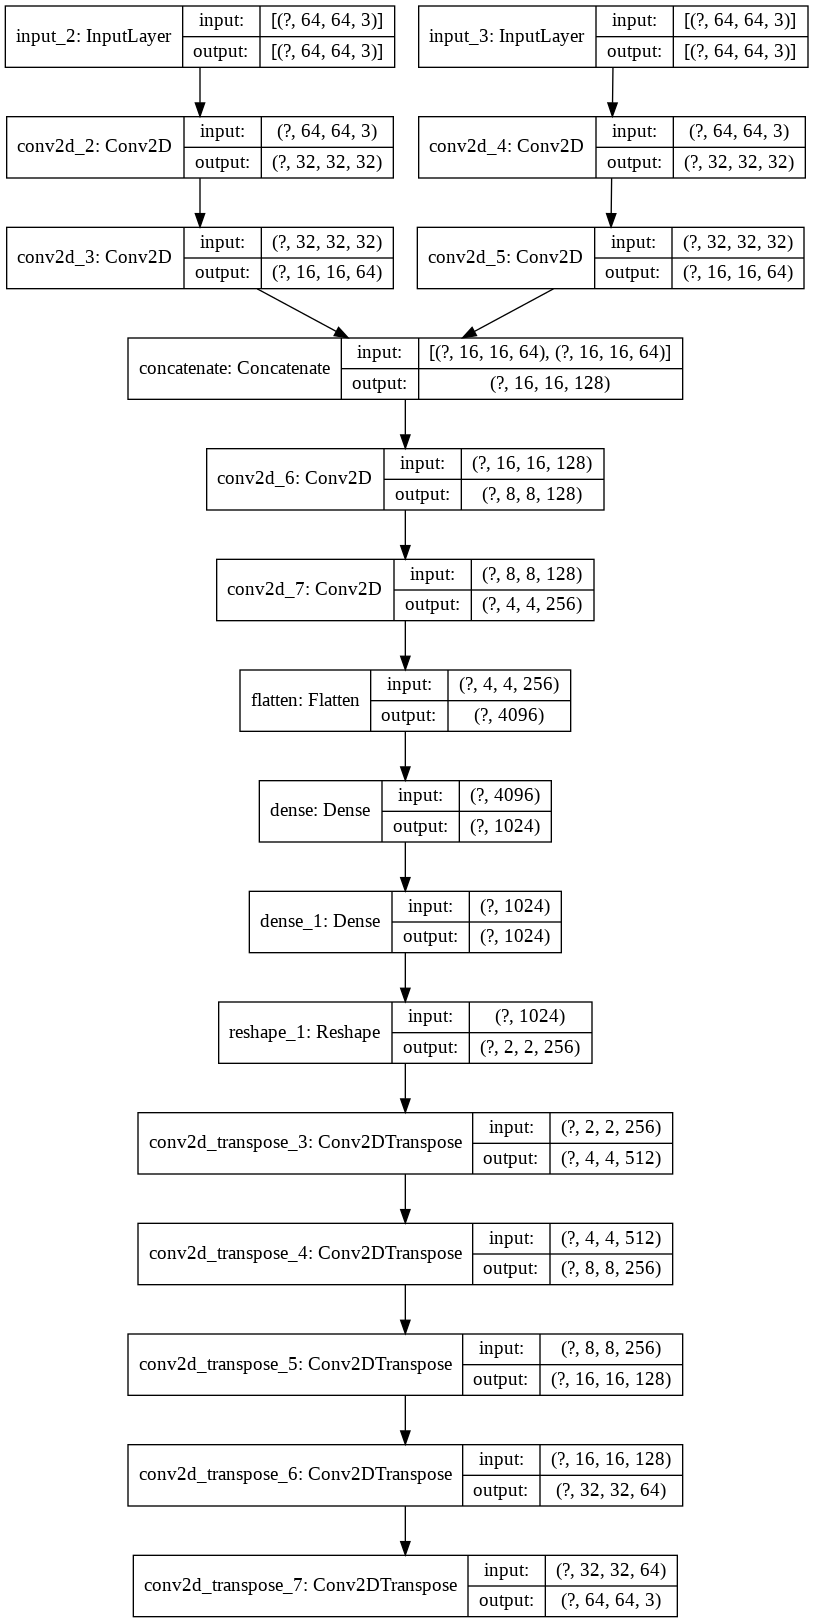

In [ ]:
plot_model(d1, show_shapes=True)